In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import numpy as np
import os
from scipy import stats
from scipy.stats import ttest_ind
plt.style.use('fivethirtyeight')
# sns.set()
plt.rcParams['figure.figsize']= (12,12)

In [2]:
GRAPH = '../result/Graphs'
TABLE = '../result/Tables'
DATA = '../data/'

<h3>Choose Desired Sector</h3>

<h3> Correct/Drop Invalid TotalVacancy Value </h3>

In [3]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v11.csv'))

In [4]:
industries = df.IndustryName.value_counts().index[:10].values  # Choosing Industries to Analysis
# df = df[df['IndustryName'].isin(cat)]
industries

array(['Information Technology (IT)', 'Others', 'Garments/ Textile',
       'Telecommunication', 'Education', 'NGO/Development',
       'Manufacturing (Heavy Industry)',
       'Bank/ Non-Bank Fin. Institution', 'Govt./ Semi-Govt./ Autonomous',
       'Wholesale/ Retail/ Export-Import'], dtype=object)

In [8]:
titles = df['ONET Title'].value_counts().index[:10].values
titles

array(['Software Developers', 'Project Management Specialists',
       'Web Developers', 'Computer Systems Engineers/Architects',
       'Web and Digital Interface Designers',
       'Computer Occupations, All Other',
       'Computer User Support Specialists',
       'Business Intelligence Analysts', 'Search Marketing Strategists',
       'Network and Computer Systems Administrators'], dtype=object)

<h1> April 9 : Hypothesis Testing </h1>

<Analysizing Full Dataset>

<h1> Analysing Whole </h1>

In [5]:
def ttest_func(field):
    combos = [(2016,2017),(2017,2018),(2018,2019),(2019,2020),(2020,2021)]
    results = pd.DataFrame(index=industries,columns=[str(x) for x in combos])
    for industry in industries:
        for yr in combos:
            temp = df[df.IndustryName == industry]
            cat1 = temp[temp['Year'] == yr[0]]
            cat2 = temp[temp['Year'] == yr[1]]
            stat,p = ttest_ind(cat1[field],cat2[field],equal_var=False,alternative='greater')
            results.loc[industry,str(yr)] = p  #< 0.1

    plot_df = df[df.IndustryName == industries[0]]
    # plot_df = plot_df.groupby(['IndustryName','Year'])['TotalVacancy'].sum().reset_index()
    sns.barplot(x='Year',y=field,data=plot_df,ci=95)
    plt.xticks(rotation=0,fontsize=22)
    plt.xlabel(None)
    plt.ylabel(ylabel,fontsize=22)
    plt.title(title,fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(f'{title}.png',dpi=350)
    return results

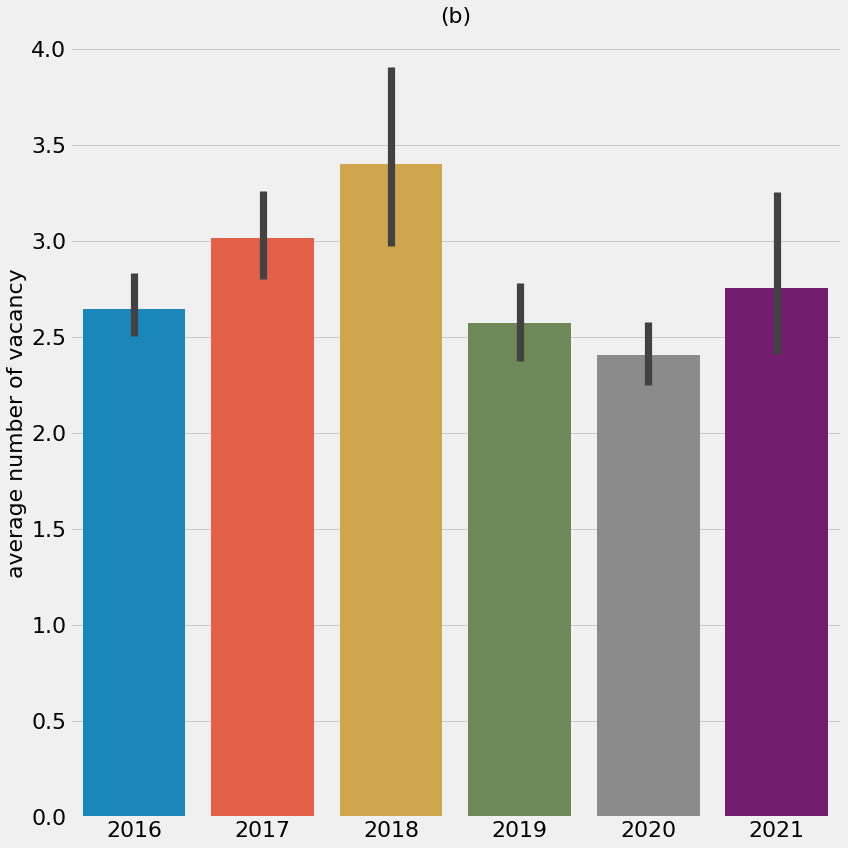

In [7]:
title = '(b)'
ylabel = 'average number of vacancy'
ttest_func('TotalVacancy').astype('float').to_csv(os.path.join(TABLE,'TotalVacancy_pval.csv'),float_format='%.3f')

In [4]:
title = '(a)'
ylabel = 'average number of applicants' 
ttest_func('number_applicants').astype('float').to_csv(os.path.join(TABLE,'pval_numapp.csv'),float_format='%.3f')

NameError: name 'ttest_func' is not defined

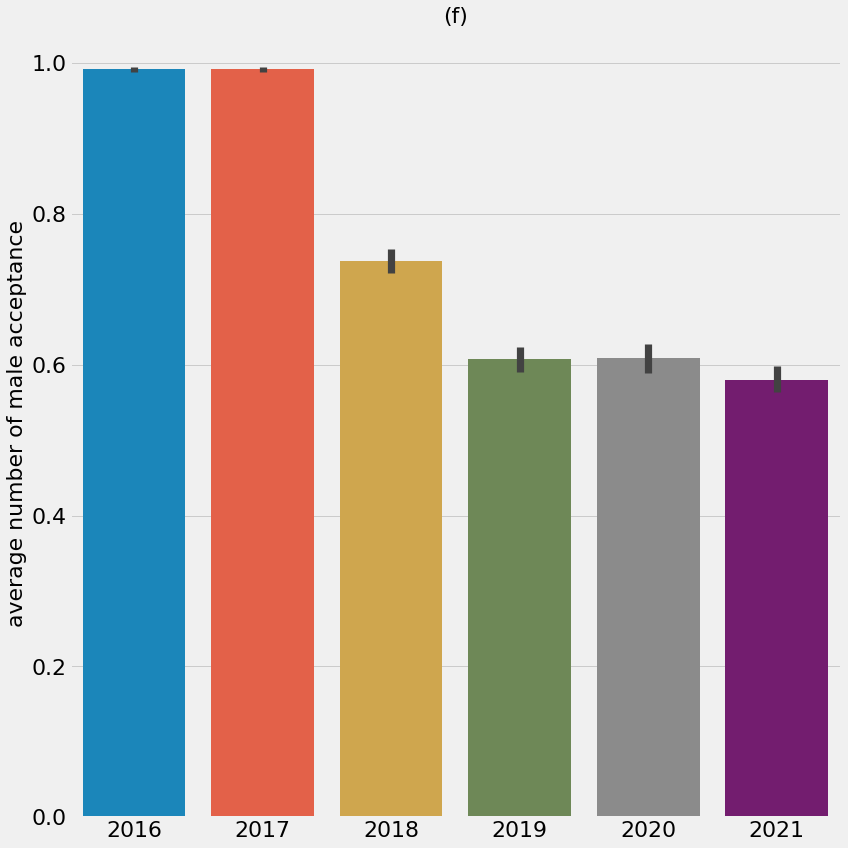

In [10]:
title = '(f)'
ylabel = 'average number of male acceptance'
ttest_func('MaleGender').astype('float').to_csv(os.path.join(TABLE,'pval_male_industry.csv'),float_format='%.3f')

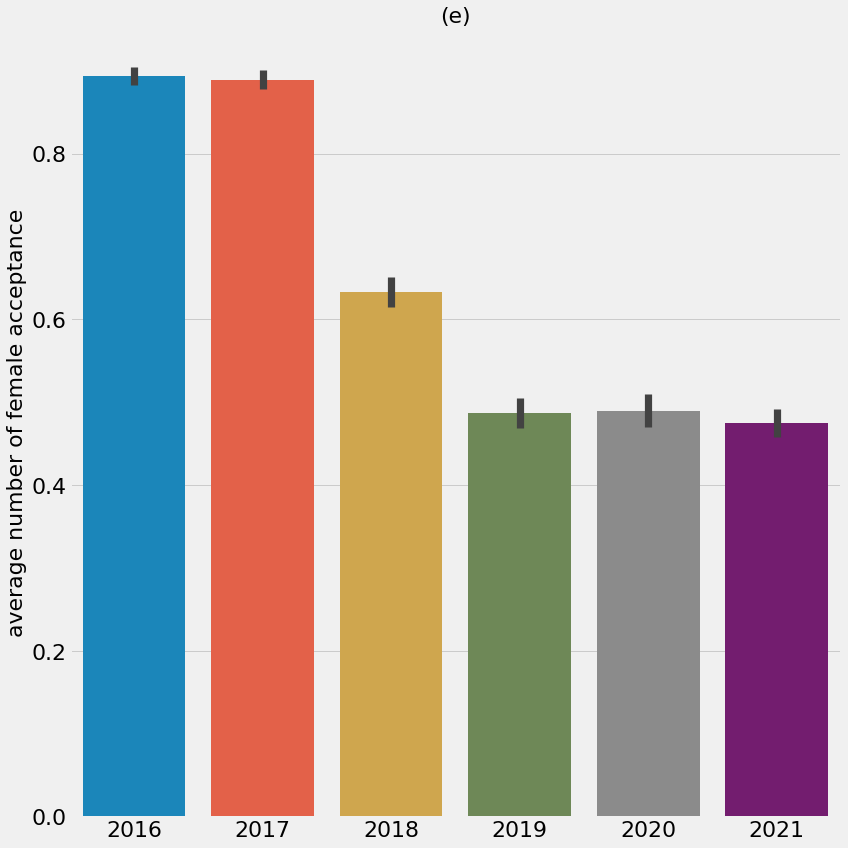

In [11]:
title = '(e)'
ylabel = 'average number of female acceptance'
ttest_func('FemaleGender').astype('float').to_csv(os.path.join(TABLE,'pval_female_industry.csv'),float_format='%.3f')

In [12]:
ttest_func('Gender')

KeyError: 'Gender'

In [12]:
def ttest_func_title(field):
    combos = [(2016,2017),(2017,2018),(2018,2019),(2019,2020),(2020,2021)]
    results = pd.DataFrame(index=titles,columns=[str(x) for x in combos])
    for title in titles[:3]:
        for yr in combos:
            temp = df[df['ONET Title'] == title]
#             temp = temp[temp['IndustryName'] == 'Bank/ Non-Bank Fin. Institution']
            cat1 = temp[temp['Year'] == yr[0]]
            cat2 = temp[temp['Year'] == yr[1]]
            stat,p = ttest_ind(cat1[field],cat2[field],equal_var=False,alternative='greater')
            results.loc[title,str(yr)] = p < 0.1
    plot_df = df[df['ONET Title'].isin(titles[0:3])]
    # plot_df = plot_df.groupby(['IndustryName','Year'])['TotalVacancy'].sum().reset_index()
    sns.barplot(x='ONET Title',y=field,hue='Year',data=plot_df,ci=95)
    plt.xticks(rotation=0,fontsize=22)
    plt.xlabel(None)
    plt.ylabel(ylabel,fontsize=22)
    plt.title(title_,fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.legend(prop={'size': 12})
    plt.savefig(f'{title_}.png',dpi=350)


    return results

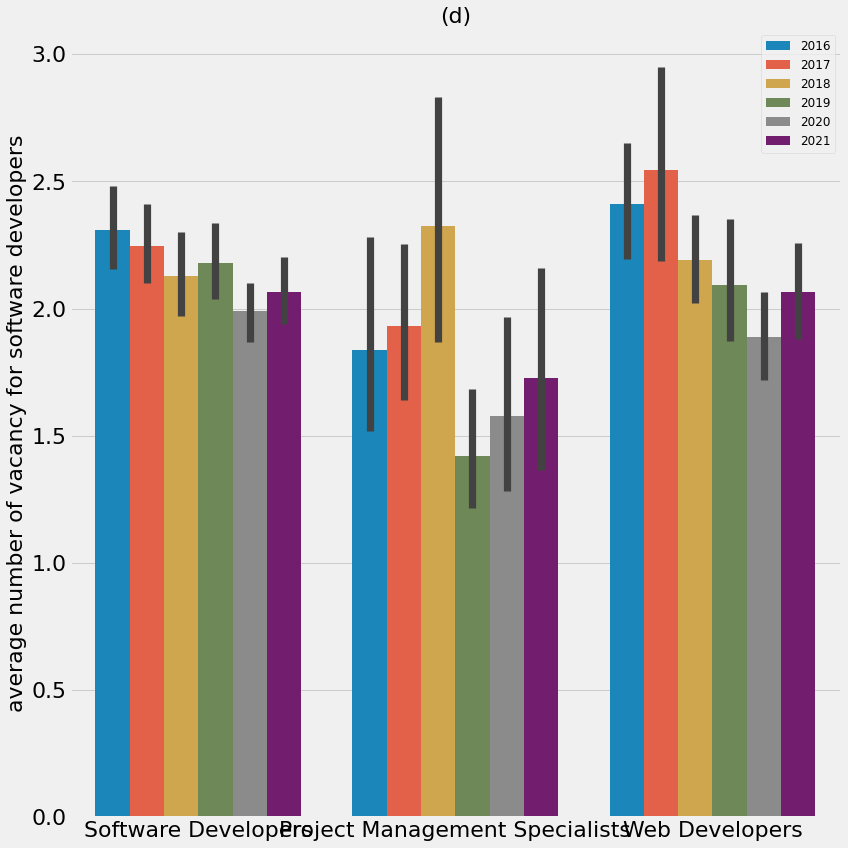

In [13]:
title_ = '(d)'
ylabel = 'average number of vacancy for software developers'
ttest_func_title('TotalVacancy').to_csv(os.path.join(TABLE,'pval_vacancy_job.csv'),float_format='%.3f')

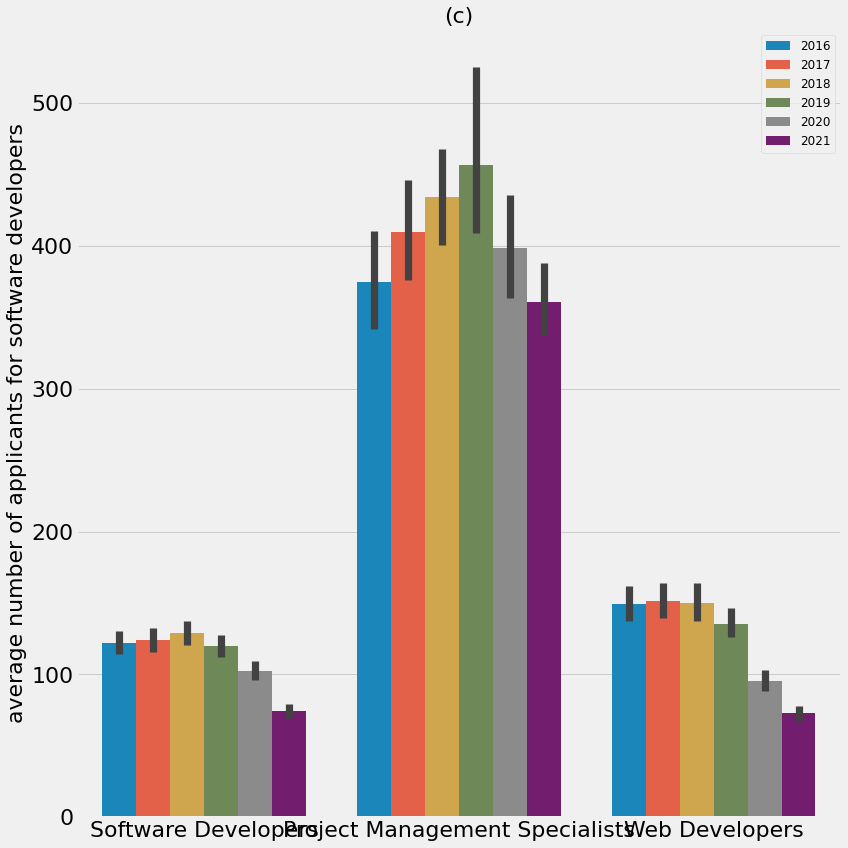

In [14]:
title_ = '(c)'
ylabel = 'average number of applicants for software developers'
ttest_func_title('number_applicants').to_csv(os.path.join(TABLE,'pval_app_job.csv'),float_format='%.3f')

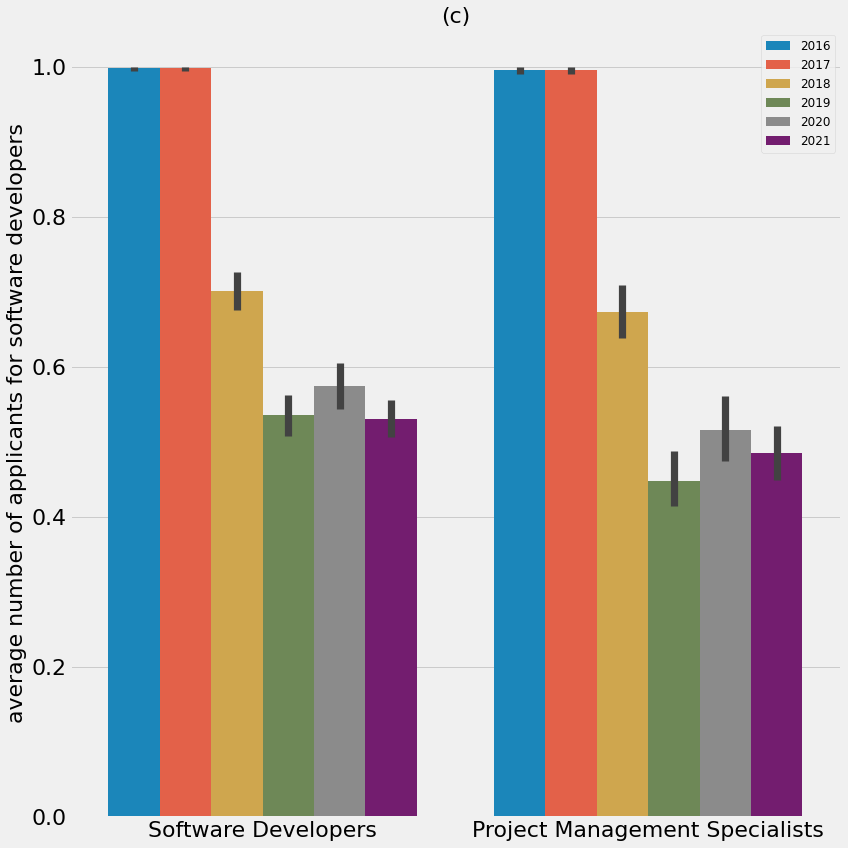

In [16]:

ttest_func_title('MaleGender').to_csv(os.path.join(TABLE,'pval_male_job.csv'),float_format='%.3f')

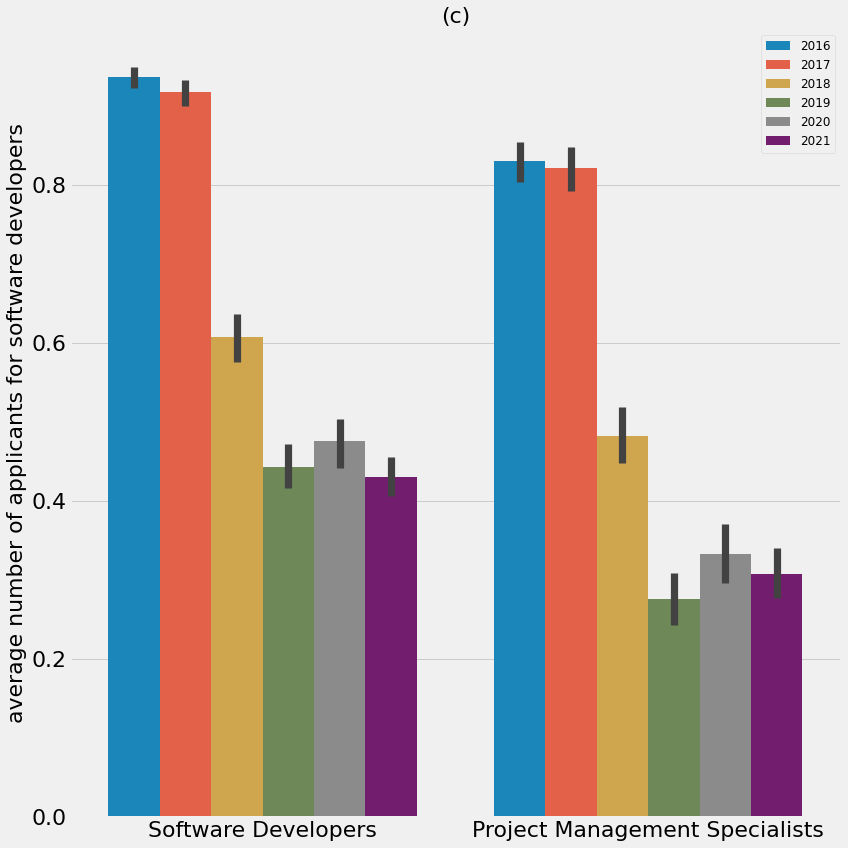

In [17]:
ttest_func_title('FemaleGender').to_csv(os.path.join(TABLE,'pval_female_job.csv'),float_format='%.3f')

In [27]:
df['IndustryName'].value_counts()

Information Technology (IT)                                  16158
Others                                                        2060
Telecommunication                                             1429
Garments/ Textile                                             1378
Education                                                     1016
NGO/Development                                                978
Manufacturing (Heavy Industry)                                 785
Bank/ Non-Bank Fin. Institution                                714
Govt./ Semi-Govt./ Autonomous                                  712
Electronics/ Consumer Durables                                 469
Wholesale/ Retail/ Export-Import                               464
Media (Satellite/ Print/ Online)/ Advertising/ Event Mgt.      418
Pharmaceuticals                                                288
Architecture/ Engineering/ Construction                        261
Real Estate/ Development                                      

In [219]:
df['Gender'] = df['MaleGender'] + df['FemaleGender']
df['Gender'] = df['Gender'].apply(lambda x : 'Both male and female' if x == 2 else x)
df['Gender'] = df['Gender'].apply(lambda x : 'Not Specified' if x == 0 else x)
for i in range(len(df)):
    if df.loc[i,'Gender'] == 1:
        if df.loc[i,'MaleGender'] == 1:
            df.loc[i,'Gender'] = 'Male only'
        else:
            df.loc[i,'Gender'] = 'Female only'
            
df['Gender'].value_counts()


Both male and female    16889
Not Specified            7140
Male only                4068
Female only               219
Name: Gender, dtype: int64

In [220]:
df.loc[df['Gender'] == 'Both male and female','Gender'] = 2
df.loc[df['Gender'] == 'Not Specified','Gender'] = 2
df.loc[df['Gender'] == 'Male only','Gender'] = 1
df.loc[df['Gender'] == 'Female only','Gender'] = 0

In [221]:
df.groupby(['Year'])['Gender'].value_counts()

Year  Gender
2016  2         4339
      1          660
      0           39
2017  2         4474
      1          762
      0           39
2018  2         4462
      1          807
      0           54
2019  2         4739
      1          791
      0           40
2020  2         3572
      1          647
      0           26
2021  2         2443
      1          401
      0           21
Name: Gender, dtype: int64